# Metrics for classification

We Previously evaluated the performance of your k-NN classifier based on its accuracy.
But accuracy is not always an informative metric. Here, we'll dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

classification report consisted of three rows, and an additional **support** column. The support gives the number of samples of the true response that lie in that class. so for example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.

Here, you'll work with the **PIMA** Indians dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of **0** indicates that the patient does not have diabetes, while a value of **1** indicates that the patient does have diabetes.

Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the dataset
diabetes = pd.read_csv('./Datasets/diabetes.csv')

# check the first few rows
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# check the dataset shape
print(diabetes.shape)

# check for missing values in the dataset
diabetes.isnull().sum()

(768, 9)


pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

The above values shows that there are no missing values in the dataset but, analysis of the first few rows shows that some columns such as `insulin` and `tricep` have some zero values.  
Let's check the number of zero values in the `tricep` and `insulin` columns.


In [4]:
# total numer of rows with 0 tricep
print(diabetes[diabetes['triceps'] == 0].shape[0], '\n')

# total number of rows with 0 insulin
diabetes[diabetes['insulin'] == 0].shape[0]

227 



374

Above we see that there are a total of 227 rows where `triceps` is zero and 374 rows where `insulin` is zero. Since it is impossible for a person to have zero insulin levels and no triceps, we know that these zero values are erronous and need to be recognized as Null values.

We'll fill these zero values as null values

In [5]:
# replace zero values in triceps with null values
diabetes['triceps'].replace(0, np.nan, inplace = True)

In [6]:
# check
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,NaN,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
4,0,137,40,35.0,168,43.1,2.288,33,1


In [7]:
# get the mean of the triceps column
mean_tricep = diabetes['triceps'].mean()

# check
mean_tricep

29.153419593345657

In [8]:
# replace the null values in triceps with the mean values
diabetes['triceps'].fillna(mean_tricep, inplace= True)

# check
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,0,33.6,0.627,50,1
1,1,85,66,29.00000,0,26.6,0.351,31,0
2,8,183,64,29.15342,0,23.3,0.672,32,1
3,1,89,66,23.00000,94,28.1,0.167,21,0
4,0,137,40,35.00000,168,43.1,2.288,33,1


The null values in the `triceps` column has been replaced with the mean of the triceps column and assigned back to original dataframe. 

Let's do the same for the insulin column:

In [9]:
# replace zero values in the insulin column with null values
diabetes['insulin'].replace(0, np.nan, inplace= True)

# check
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,NaN,33.6,0.627,50,1
1,1,85,66,29.00000,NaN,26.6,0.351,31,0
2,8,183,64,29.15342,NaN,23.3,0.672,32,1
3,1,89,66,23.00000,94.0,28.1,0.167,21,0
4,0,137,40,35.00000,168.0,43.1,2.288,33,1


In [10]:
# get the mean of the insulin column
mean_insulin = diabetes['insulin'].mean()

# check
mean_insulin

155.5482233502538

In [11]:
# replace the null values in the insulin column with the mean_insulin
diabetes['insulin'].fillna(mean_insulin, inplace= True)

# check
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.00000,155.548223,33.6,0.627,50,1
1,1,85,66,29.00000,155.548223,26.6,0.351,31,0
2,8,183,64,29.15342,155.548223,23.3,0.672,32,1
3,1,89,66,23.00000,94.000000,28.1,0.167,21,0
4,0,137,40,35.00000,168.000000,43.1,2.288,33,1


The null values in the `insulin` column has been replaced with the mean of the triceps column and assigned back to original dataframe.

In [12]:
# lets get the descriptives of the diabetes dataframe
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Modelling

In [13]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
# get the features and target (independent and dependent variables) from the dataset
# get features
x = diabetes.drop('diabetes', axis = 1)

# get the target variable
y = diabetes['diabetes']

# check
print(x.shape, type(x))
print(y.shape, type(y))

(768, 8) <class 'pandas.core.frame.DataFrame'>
(768,) <class 'pandas.core.series.Series'>


In [15]:
# Create training and testing sets with 40% of the data used for testing. Use a random state of 42.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.4)

# Instantiate a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Predict the labels of the test data: call it y_pred
y_pred = knn.predict(x_test)

# generate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# generate classification report
print(classification_report(y_test, y_pred))

[[177  29]
 [ 52  50]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       206
           1       0.63      0.49      0.55       102

    accuracy                           0.74       308
   macro avg       0.70      0.67      0.68       308
weighted avg       0.73      0.74      0.73       308



**Note** *its from the predicted values we know if its a True Posive, True Negative, False Positive or False Positive. If the predicted positive class is same as the actual positive class, we get a True Positive, If the the predicted Negative class is same as the actual Negative class, we get a True Negative, If the Predicted Positive class is not same as the actual positive class, the prediction becomes False and since the prediction is done for the positive class, we have a* ***False Positive***, *If the predicted Negative class is not same as the actual negative class, the prediction becomes False and because it was predicted for the negative class, we have a* ***False Negative***

The above confusion matrix shows that our model predicted the following:

- 177 patients who do not have diabetes were predicted correctly by our model as not to have diabetes (True Positive)
- 29 patients who do not have diabetes were predicted wrongly by our model to have diabetes (False Negative)
- 52 patients who have diabetes were wrongly predicted by our model not to have diabetes. (False Positive)
- 50 patients who actually have diabetes were correctly predicted by our model to have diabetes. (True Negative)

The classification report of our model shows that:

- The high precision of value (0.77) for the class of those who do not have diabetes (0) shows that our model has a lower false positive rate or we can say it has a higher true positive rate. In other words, a small amount of those who have diabetes were predicted as though they do not have diabetes.

- The high precision value (0.63) for the class of those who have diabetes (1) shows that our model has a lower false negative rate in predicting those who have diabetes. In other words, a higher amount of those who have diabetes, were predicted as though they have.

- The high recall value (0.86) for the class of those who do not have diabetes (0) shows that our model predicted most of those who do not have diabetes correctly. ( Low false negative rate )

- The low recall value (0.49) for the class of those who have diabetes (1) shows that our model predicted a majority of those who have diabetes wrongly. ( high false positive rate)


# Logistic regression and the ROC curve

### Building a logistic regression model

Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out!



In [16]:
# import logistics regression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier called logreg.
logreg = LogisticRegression(max_iter=10000, solver= 'saga')

# Fit the classifier to the training data
logreg.fit(x_train, y_train)

# Predict the labels of the test set: y_pred
y_pred_2 = logreg.predict(x_test)

# Compute and print the confusion matrix
print(confusion_matrix(y_test, y_pred_2))

# Compute and print the classification report.
print(classification_report(y_test, y_pred_2))

[[174  32]
 [ 59  43]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       206
           1       0.57      0.42      0.49       102

    accuracy                           0.70       308
   macro avg       0.66      0.63      0.64       308
weighted avg       0.69      0.70      0.69       308



Logistic regression is used in a variety of machine learning applications and is a vital part of the data science toolbox.

### Plotting an ROC curve

Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a `.predict_proba()` method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the `.predict_proba()` method and become familiar with its functionality.



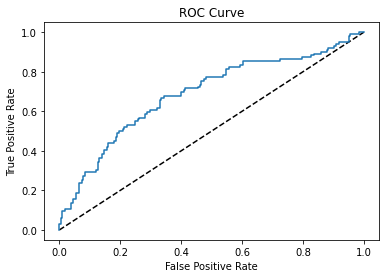

In [17]:
# Import roc_curve from sklearn.metrics.
from sklearn.metrics import roc_curve

# Using the logreg classifier, which has been fit to the training data,
# compute the predicted probabilities of the labels of the test set X_test.
# Save the result as y_pred_prob.
y_pred_prob = logreg.predict_proba(x_test)[:, 1]

# Use the roc_curve() function with y_test and y_pred_prob
# and unpack the result into the variables fpr, tpr, and thresholds.
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_prob)

# plot a diagonal dashed line ranging from 0 to 1 0n both axis
plt.plot([0, 1], [0, 1], 'k--')

# Plot the ROC curve with fpr on the x-axis and tpr on the y-axis.
plt.plot(false_positive_rate, true_positive_rate)

# x axis label
plt.xlabel('False Positive Rate')

# y axis label
plt.ylabel('True Positive Rate')

# plot title
plt.title('ROC Curve')

# display the plot
plt.show()

This ROC curve provides a nice visual way to assess your classifier's performance.

# Precision-Recall Curve

When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. Precision-recall curves plot the positive predictive value or precision (PPV, y-axis) against the true positive rate (TPR, x-axis).


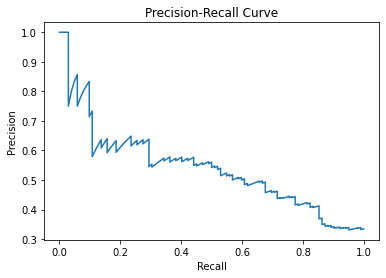

In [18]:
# import precision recall curve
from sklearn.metrics import precision_recall_curve

# get the precision recall and threshold array
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob)

# Plot the precision recall curve with precision on the y-axis and recall on the x-axis.
plt.plot(recall, precision)

# x axis label
plt.xlabel('Recall')

# y axis label
plt.ylabel('Precision')

# plot title
plt.title('Precision-Recall Curve')

# display the plot
plt.show()

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate (The model identifies correctly and to a high extent the True positive values or correct prediction of the positive class), and high recall relates to a low false negative rate (The model identifies correctly and to a high extent the True Negative values). High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A recall of 1 corresponds to a classifier with a low threshold in which all females who contract diabetes were correctly classified as such (Recall or TPR), at the expense of many misclassifications (precision, PPV) of those who did not have diabetes.

In other words, the above curve shows that at higher True positive rates, the model misclassified those who did not have diabetes as though they had

**Note** *Precision is undefined for a classifier which makes no positive predictions, that is, classifies everyone as not having diabetes. In the case when there are no true positives or true negatives, precision is 0/0, which is undefined.*   
*Also, When the threshold is very close to 1, precision is also 1, because the classifier is absolutely certain about its predictions. This is True because as we noticed a high precision corresponds to a low recall: The classifier has a high threshold to ensure the positive predictions it makes are correct, which means it may miss some positive labels that have lower probabilities.*

# AUC computation

Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!



In [19]:
# import the roc_auc score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

"""
Using the logreg classifier from the preceeding cells,
which has been fit to the training data, and on which we have
computed the predicted probabilities of the labels of the test set x_test. and saved the result as y_pred_prob.
We'll Compute the AUC score using the roc_auc_score() function,
the test set labels y_test, and the predicted probabilities y_pred_prob.
"""
# Compute and print AUC score
print(f'AUC Score{roc_auc_score(y_test, y_pred_prob)}')

"""
Compute the AUC scores by performing 5-fold cross-validation. 
Use the cross_val_score() function and specify the scoring parameter to be 'roc_auc'.
"""
# instantiate the cross_val_score and 
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, x, y, scoring = 'roc_auc')

print(f"AUC scores computed using 5-fold cross-validation: {cv_auc}")
print(f"Average AUC scores computed using 5-fold cross validation is: {cv_auc.mean()}")

AUC Score0.687797449076718
AUC scores computed using 5-fold cross-validation: [0.63944444 0.71314815 0.69222222 0.66433962 0.71433962]
Average AUC scores computed using 5-fold cross validation is: 0.6846988120195667


These are different methods you can use to evaluate your model's performance

# Hyperparameter tuning with GridSearchCV

We can tune the `n_neighbors` parameter of the `KNeighborsClassifier()` using `GridSearchCV`

Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C.  
C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

First, we'll setup a hyperparameter space.  
We'll use GridSearchCV and logistic regression to find the optimal C in this hyperparameter space. The focus here is on the process of setting up the hyperparameter grid and performing grid-search cross-validation.

In [20]:
# import relevant modules
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid by using c_space as the grid of values to tune C over
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space}

# Use GridSearchCV with 5-fold cross-validation to tune C:
# Inside GridSearchCV(), specify the classifier, parameter grid, and number of folds to use.
logreg_cv = GridSearchCV(logreg, param_grid = param_grid, cv = 5)

# Use the .fit() method on the GridSearchCV object to fit it to the data x and y.
logreg_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.6992021050844581


It looks like a `C` of 0.439 results in the best performance.

# Hyperparameter tuning with RandomizedSearchCV

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have .fit() and .predict() methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as max_features, max_depth, and min_samples_leaf: This makes it an ideal use case for RandomizedSearchCV.



In [21]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# import random integer from scipy.stat
from scipy.stats import randint

# RandomizedSearchCV from sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV

# Specify the parameters and distributions to sample from.
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Use RandomizedSearchCV with 5-fold cross-validation to tune the hyperparameters:
# Inside RandomizedSearchCV(), specify the classifier, parameter distribution, and number of folds to use.
tree_cv = RandomizedSearchCV(tree, param_distributions = param_dist, cv=5)

# Use the .fit() method on the RandomizedSearchCV object to fit it to the data X and y.
tree_cv.fit(x, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 4, 'min_samples_leaf': 1}
Best score is 0.7474832357185297


We'll see a lot more of decision trees and RandomizedSearchCV as you continue your machine learning journey. Note that RandomizedSearchCV will never outperform GridSearchCV. Instead, it is valuable because it saves on computation time.

# Hold-out set in practice I: Classification

In addition to C, logistic regression has a 'penalty' hyperparameter which specifies whether to use 'l1' or 'l2' regularization. Your job in this exercise is to create a hold-out set, tune the 'C' and 'penalty' hyperparameters of a logistic regression classifier using GridSearchCV on the training set.

In [22]:
# Create the hyperparameter grid:
# Use the array c_space as the grid of values for 'C'.
# For 'penalty', specify a list consisting of 'l1' and 'l2'.
c_space_2 = np.logspace(-5, 8, 15)
param_grid_2 = {'C': c_space_2, 'penalty': ['l1', 'l2']}

"""
We have already Instantiated a logistic regression classifier as logreg. 
And Created training and test sets. Using a test_size of 0.4 and random_state of 42.
In practice, the test set here will function as the hold-out set.
"""
# instantiate the GridSearchCV object with the new correct parameters as logreg_cv_2
logreg_cv_2 = GridSearchCV(logreg, param_grid = param_grid_2, cv = 5)

# Fit it to the training data
logreg_cv_2.fit(x_train, y_train)

# Print the best parameter and best score obtained from GridSearchCV
# by accessing the best_params_ and best_score_ attributes of logreg_cv
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv_2.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv_2.best_score_))

Tuned Logistic Regression Parameter: {'C': 0.006105402296585327, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.673913043478261


# Hold-out set in practice II: Regression

Remember lasso and ridge regression from the previous chapter? Lasso used the L1 penalty to regularize, while ridge used the L2 penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

>> a*L1 + b*L2

In scikit-learn, this term is represented by the `l1_ratio` parameter: An `l1_ratio` of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

Here, we'll use GridSearchCV to tune the `l1_ratio` of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.



In [23]:
# read the file
gapminder = pd.read_csv('./Datasets/gm_2008_region.csv')

# inspect the dataframe
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [24]:
# get all numeric features
x_2 = gapminder.drop(['Region', 'life'], axis = 1).values

# get dependent variable
y_2 = gapminder['life'].values

# check
print(y_2.shape)
x_2.shape

(139,)


(139, 8)

In [25]:
# Import the following modules:
# ElasticNet from sklearn.linear_model.
# mean_squared_error from sklearn.metrics.
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet

# Specify the hyperparameter grid for 'l1_ratio' using l1_space as the grid of values to search over.
# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid_3 = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor.
elastic_net = ElasticNet(max_iter = 10000000, tol = 1.0)

"""
Use GridSearchCV with 5-fold cross-validation to tune 'l1_ratio'
on the training data X_train and y_train. This involves:
first instantiating the GridSearchCV object with the correct parameters
and then fitting it to the training data.
"""

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid = param_grid_3, cv=5)

# Fit it to the training data
gm_cv.fit(x_train, y_train)

# Predict on the test set and compute metrics
y_pred_3 = gm_cv.predict(x_test)

# compute R squared
r2 = gm_cv.score(x_test, y_test)

# compute mean squared error
mse = mean_squared_error(y_test, y_pred_3)

print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.10344827586206896}
Tuned ElasticNet R squared: 0.2301890503601418
Tuned ElasticNet MSE: 0.17051007414649075
